## Stroke Prediction Dataset EDA Project 
Dataset:
fedesoriano. 2021-01-26. Stroke Prediction Dataset, Version 1. Retrieved 2021-05-20 from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

Stroke is the 5th leading cause of death and disability in the United States according to the American Heart Association.  Every 40 seconds in the US, someone experiences a stroke and every 4 minutes, someone dies from it according to the CDC. A recent figure of stroke-related cost almost reached $46 billion.  Through this project, we will explore which factors are the leading drivers for stroke to bring awareness to individuals and lay the basic analysis for future work in building a predictive model using Machine Learning which could be benefitial to hospitals and insurance companies in estimating risk and pricing.

***Attribute Information
1) id: unique identifier <br> 
2) gender: "Male", "Female" or "Other"<br> 
3) age: age of the patient<br> 
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br> 
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br> 
6) ever_married: "No" or "Yes"<br> 
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br> 
8) Residence_type: "Rural" or "Urban"<br> 
9) avg_glucose_level: average glucose level in blood<br> 
10) bmi: body mass index<br> 
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br> 
12) stroke: 1 if the patient had a stroke or 0 if not<br> 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 
from scipy import stats
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

### Read in data & clean

In [4]:
df = pd.read_csv('stroke_prediction_data.csv')
df.head(10) # let's look at the top 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
6,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
7,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
8,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
9,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0


In [14]:
df.tail(10) # let's look at the bottom 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,NaN,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [7]:
df.shape  #5110 rows and 12 attributes 

(5110, 12)

In [11]:
df.info() #datatypes are numeric and object (categorical) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Let's find out the stroke percentage of the record:

In [42]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

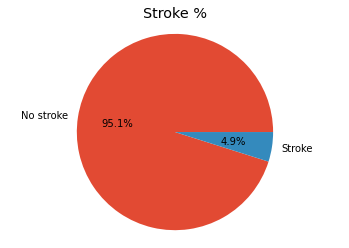

In [44]:
df_stroke = df['stroke'].value_counts()
my_labels = 'No stroke', 'Stroke'
plt.pie(df_stroke, labels = my_labels, autopct= '%1.1f%%')
plt.title('Stroke %')
plt.axis('equal')
plt.show()

In [19]:
 #Let's find out if there are any null values:  
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is 4.9%:

In [50]:
len(df[df['bmi'].isna() & df['stroke']==1]) 

40

There are 40 stroke patients among the null BMI values making up 16% of total strokes! so we will NOT remove them and instead will fill in the mean BMI values in order to keep all the stroke counts:

In [52]:
bmi_mean = df['bmi'].mean()
bmi_mean = np.round(bmi_mean, 1)
bmi_mean

28.9

In [53]:
df['bmi'].fillna(bmi_mean, inplace = True) 
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,28.9,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [55]:
#Let's ensure that there is no null value left in BMI field:
df['bmi'].isna().sum()

0

Let's explore the column fields more to learn about what kind of different values the CATEGORICAL fields have:

In [56]:
df['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [57]:
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1327,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is 1 'Other' record in the Gender field that we can remove since the size is insignificant: 

In [60]:
df = df[df['gender'] != 'Other']
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Let's drop the id field since we will not be using it for analysis: 

In [62]:
df.drop(['id'], axis=1, inplace = True)
df.head()

C:\Users\oyb50\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [64]:
df['hypertension'].value_counts() 

0    4611
1     498
Name: hypertension, dtype: int64

In [65]:
df['heart_disease'].value_counts() 

0    4833
1     276
Name: heart_disease, dtype: int64

In [66]:
df['ever_married'].value_counts() 

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [63]:
df['work_type'].value_counts() 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [67]:
df['Residence_type'].value_counts() 

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [69]:
df['smoking_status'].value_counts() 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [73]:
len(df[df['smoking_status']== 'Unknown'])/len(df)

0.30221178312781366

Since the 'Unknown' category within the 'smoking_status' field makes up 30.2% of the records, we will leave it alone.  

### Exploratory Analysis 

To get a general sense, let's use heatmap correlation to see how factors correlate to each other:

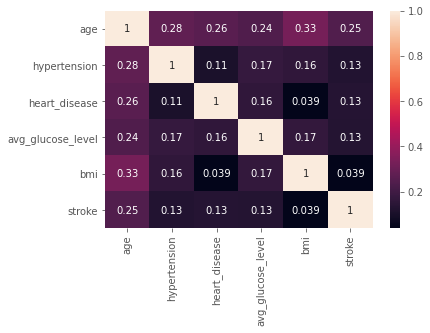

In [75]:
sns.heatmap(df.corr(), annot = True)
plt.show()

We see that in general the fields have low correlation with each other.  For Stroke, the highest correlation seems to be Age.  Next, with Age, BMI field seems to be correlated the highest and then Hypertension and Heart_disease followed by Avg_glucose level.  Before we explore these correlated fields further, let's see the distributions of the numerical fields - Age, BMI, and Avg_glucose_level: